In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, parser='auto')

In [2]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
# data, target

X, y = mnist['data'].to_numpy(), mnist['target']

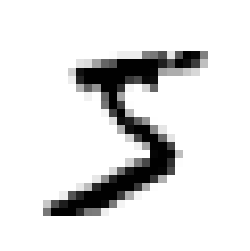

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image=some_digit.reshape(28, 28)

plt.figure(figsize=(3,3))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
print(y[0])

5


2.210739197207331e-06


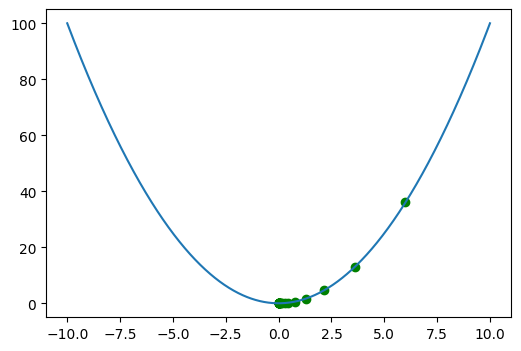

In [6]:
# gradient descent

import numpy as np

def gradient_descent(gradient, start, learn_rate, n_iter, tolerance):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        
        if np.all(np.abs(diff) <= tolerance):
            break
        
        vector += diff
        
        #print(diff)
        plt.plot(vector, vector**2, color='green', linestyle='solid', linewidth = 3, 
         marker='o')
        
    return vector

plt.figure(figsize=(6, 4))
print( gradient_descent( gradient=lambda v: 2*v, start=10.0, learn_rate=0.2, n_iter=50, 
                         tolerance=1e-06 ) )
xpts = np.linspace(-10, 10, 1000)
test = lambda x: x**2
plt.plot(xpts, test(xpts))
plt.show()

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_5=(y_train.to_numpy()=='5')
y_test_5=(y_test.to_numpy()=='5')

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=43)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=43)

In [10]:
from sklearn.model_selection import cross_val_score,cross_val_predict 

print( cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy') )

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

[0.9629  0.96655 0.9638 ]


In [11]:
from sklearn.metrics import confusion_matrix

print( confusion_matrix(y_train_5, y_train_pred) )

[[53756   823]
 [ 1312  4109]]
